In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Clasificarea genurilor masculin/feminin
<b><i>Categoriile vor fi impartite in modul urmator:</i></b>
<ol>
<li><b>label 0:</b> 04 - 06 ani (early childhood)</li>
<li><b>label 1:</b> 07 - 08 ani (middle childhood)</li>
<li><b>label 2:</b> 09 - 11 ani (late childhood)</li>
<li><b>label 3:</b> 12 - 19 ani (adolescence)</li>
<li><b>label 4:</b> 20 - 27 ani (early adulthood)</li>
<li><b>label 5:</b> 28 - 35 ani (middle adulthood)</li>
<li><b>label 6:</b> 36 - 45 ani (midlife)</li>
<li><b>label 7:</b> 46 - 60 ani (mature adulthood)</li>
<li><b>label 8:</b> 61 - 75 ani (late adulthood)</li>
</ol>
<ul>
<li><b>label 0:</b> F</li>
<li><b>label 1:</b> M</li>
</ul>

### Salvam matricile imaginilor si etichetele in train_images, train_labes, test_images, test_labels.
In acest caz am un numar egal de imagini in cele 2 clase (aprox 5500), deci nu va mai fi nevoie sa iau 80% de imagini pentru antrenare din fiecare clasa.

In [ ]:
import os
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

path_imagini_main = "./imagini_VGG_cu_appa"
lista_foldere = ["04-06", "07-08", "09-11", "12-19", "20-27", "28-35", "36-45", "46-60", "61-75"]
lista_subfoldere = ['f', 'm']

histo = [0] * len(lista_subfoldere)
lista_imag_label = []

print("Loading", end="")
for nume_folder in lista_foldere:
    for nume_subfolder in lista_subfoldere:
        path_imagini = "{}/{}/{}".format(path_imagini_main, nume_folder, nume_subfolder)
        for dirname, subdirnames, filenames in os.walk(path_imagini):
            for filename in filenames:
                if nume_subfolder == 'f':
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[0] += 1
                    lista_imag_label.append([image, 0])

                elif nume_subfolder == 'm':
                    image = cv2.imread("{}/{}".format(dirname, filename))
                    image = cv2.resize(image, (224,224))
                    histo[1] += 1
                    lista_imag_label.append([image, 1])
    
            # Print Loading
            print(".", end="")
print()

len_total = (len(lista_imag_label))
print("Au fost gasite in total {} imagini. Din care:".format(len_total))
print("- {0[0]} apartin clasei 0 (f) \n- {0[1]} apartin clasei 1 (m)".format(histo))

# ## Met1: Daca pun toate pozele la un loc si aleg 80% din ele:
random.shuffle(lista_imag_label)
len_train = int(0.8 * len_total)

train_images = [lista_imag_label[i][0] for i in range(0, len_train)]
train_labels = [lista_imag_label[i][1] for i in range(0, len_train)]

test_images = [lista_imag_label[i][0] for i in range(len_train, len_total)]
test_labels = [lista_imag_label[i][1] for i in range(len_train, len_total)]

print()
print("Au fost incarcate {} pentru antrenare.".format(len(train_images)))
print("Au fost incarcate {} pentru testare.".format(len(test_images)))

Loading..................
Au fost gasite in total 10674 imagini. Din care:
- 4977 apartin clasei 0 (f) 
- 5697 apartin clasei 1 (m)

Au fost incarcate 8539 pentru antrenare.
Au fost incarcate 2135 pentru testare.


<BarContainer object of 2 artists>

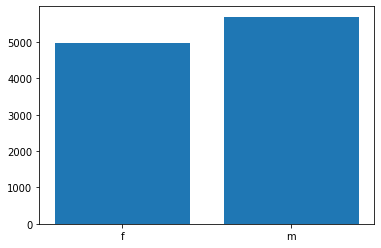

In [ ]:
# ## Histograma mod distribuire a claselor
plt.figure()
plt.bar(lista_subfoldere, histo)

##### Salvam listele de imagini "train_images", "test_images", respectiv listele cu labels "train_labels", "test_labels" ca fisiere NPZ (Save our dataset as NPZ files)
- Vom folosi numpy's savez function:

In [ ]:
np.savez('GenderClass_train_data.npz', np.array(train_images))
np.savez('GenderClass_train_labels.npz', np.array(train_labels))
np.savez('GenderClass_test_data.npz', np.array(test_images))
np.savez('GenderClass_test_labels.npz', np.array(test_labels))

print("Done!")

Done!


---
---
##### Loader Function:

In [ ]:
import numpy as np

def load_data_training_and_test(datasetname):
    
    npzfile = np.load(datasetname + "_train_data.npz")
    train = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_train_labels.npz")
    train_labels = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_data.npz")
    test = npzfile['arr_0']
    
    npzfile = np.load(datasetname + "_test_labels.npz")
    test_labels = npzfile['arr_0']

    return (train, train_labels), (test, test_labels)

#### In Google Colab:
- MOUNT GOOGLE DRIVE
- IMPORT NPZ FILES FROM GOOGLE DRIVE (dureaza 30 secunde)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!sudo rm -r sample_data

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Incarca fisierele .npz din Gdrive in Colab
%cp './drive/My Drive/Colab_Notebooks/Licenta/GenderClass_train_data.npz' 'GenderClass_train_data.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/GenderClass_train_labels.npz' 'GenderClass_train_labels.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/GenderClass_test_data.npz' 'GenderClass_test_data.npz'
%cp './drive/My Drive/Colab_Notebooks/Licenta/GenderClass_test_labels.npz' 'GenderClass_test_labels.npz'
print("Fisiere incarcate!")
%ls

Fisiere incarcate!
drive/                       GenderClass_train_data.npz
GenderClass_test_data.npz    GenderClass_train_labels.npz
GenderClass_test_labels.npz


##### Let's get our data ready in the format expected by Keras

- x_train = training images in format expected by keras
- y_train = labels of training images in format expected by keras
- x_test = test images in format expected by keras
- y_test = labels of test images in format expected by keras

### HOT ONE ENCODING
<b> [ Acest cod bloc trebuie rulat inainte de a testa modelul: model.predict_classes(...) ] </b>

In [ ]:
from keras.utils import to_categorical # One Hot Enconding (pentru clasificare non-binara)
# https://stackoverflow.com/questions/49392972/error-when-checking-target-expected-dense-3-to-have-shape-3-but-got-array-wi
from datetime import datetime
x = datetime.now()

(x_train, y_train), (x_test, y_test) = load_data_training_and_test("GenderClass")

# Reshaping our label data with One Hot Encoding: from (600,) to (600, 8)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Change our image type to float32 data type
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_test /= 255

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
y = datetime.now()
print("Durata totala de incarcare: {}".format(abs(y-x)))

Using TensorFlow backend.


(8539, 224, 224, 3)
(2135, 224, 224, 3)
(8539, 2)
(2135, 2)
Durata totala de incarcare: 0:00:27.939013


---
### CREAREA RETELEI CONVOLUTIONALE (CNN) - Arhitectura modelului

In [ ]:
from keras import applications

mobile = applications.mobilenet.MobileNet()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
mobile.summary()

In [ ]:
from keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout
from keras.models import Model

x = mobile.layers[-6].output # -6 in loc de -63 pentru a folosi intreaga retea
# x = GlobalAveragePooling2D(data_format=None)(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=mobile.input, output=predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [ ]:
from keras.optimizers import SGD
optim = SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(optimizer=optim,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print("ok!")

ok!


### ANTRENAREA MODELULUI (in Colab):

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

x = datetime.now()
print(x)

###### Checkpoint - Save the model with the lowest val_loss ! ######
callbacks_list = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint(filepath='GenderClass_best.h5', monitor='val_loss', save_best_only=True, verbose = 1),
    # ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 20, min_delta=1E-7, verbose=1)
]

epochs = 50
batch_size = 4

try:
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs,
                        validation_data=(x_test, y_test),
                        shuffle=True,
                        callbacks=callbacks_list)
except KeyboardInterrupt:
    model.save("GenderClass.h5")
    print("\nKeyboardInterrupt: Don't worry, the model was still saved !")

# Salvarea modelului: include arhitectura, weights, training configuration (loss, optimizer), the state of optimizer
model.save("GenderClass.h5")

# Evaluate the performance the trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: {}'.format(scores[0]))
print('Test accuracy: {} \n'.format(scores[1]))

y = datetime.now()
print(y)
print("Durata totala de antrenare: {}".format(abs(y-x)))

2020-06-03 19:25:05.251456

Train on 8539 samples, validate on 2135 samples
Epoch 1/50
8539/8539 [==============================] - 162s 19ms/step - loss: 1.3262 - accuracy: 0.7179 - val_loss: 0.4415 - val_accuracy: 0.8169

Epoch 00001: val_loss improved from inf to 0.44152, saving model to GenderClass_best.h5
Epoch 2/50
8539/8539 [==============================] - 153s 18ms/step - loss: 0.3649 - accuracy: 0.8514 - val_loss: 0.3120 - val_accuracy: 0.8684

Epoch 00002: val_loss improved from 0.44152 to 0.31198, saving model to GenderClass_best.h5
Epoch 3/50
8539/8539 [==============================] - 153s 18ms/step - loss: 0.2787 - accuracy: 0.8890 - val_loss: 0.2551 - val_accuracy: 0.8890

Epoch 00003: val_loss improved from 0.31198 to 0.25514, saving model to GenderClass_best.h5
Epoch 4/50
8539/8539 [==============================] - 154s 18ms/step - loss: 0.2272 - accuracy: 0.9083 - val_loss: 0.2339 - val_accuracy: 0.9119

Epoch 00004: val_loss improved from 0.25514 to 0.23392, savi

In [ ]:
%cp 'GenderClass_best.h5' './drive/My Drive/Colab_Notebooks/Licenta/GenderClass_best.h5'
print("Model salvat in Drive!")

Model salvat in Drive!


In [ ]:
from google.colab import files
# files.download( "/content/AgeClass.h5" )
files.download( "/content/GenderClass_best.h5" )
print("Model salvat local!")

### Afisare grafic LOSS si ACCURACY (imediat dupa antrenare):

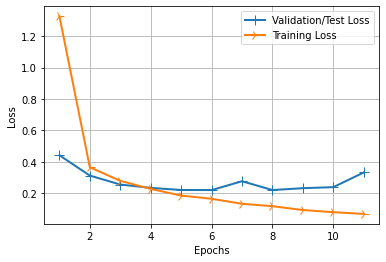

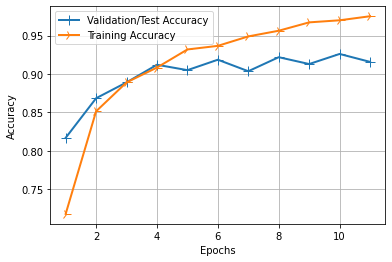

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 

history_dict = history.history

### Grafic LOSS:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Grafic ACCURACY
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

---
## Confusion Matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Durata totala afisare matrice confuzie: 0:00:15.771087


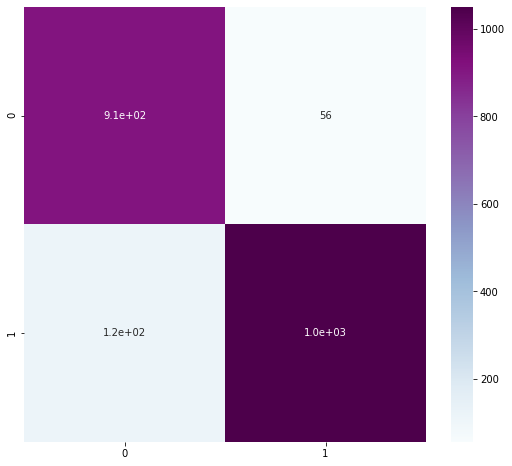

In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline 

from datetime import datetime
x = datetime.now()

most_recent = "GenderClass.h5"
most_recent2 = "GenderClass_best.h5"
model = load_model(most_recent2)

y_pred = np.int32([np.argmax(r) for r in model.predict(x_test)])
plt.figure(figsize=(9,8))
cm = confusion_matrix(y_true=y_test.argmax(axis=1),
                      y_pred=y_pred)

# cm = cm / cm.sum(axis=1) # Show in procents %
sn.heatmap(cm, annot=True, cmap="BuPu")

y = datetime.now()
print("Durata totala afisare matrice confuzie: {}".format(abs(y-x)))

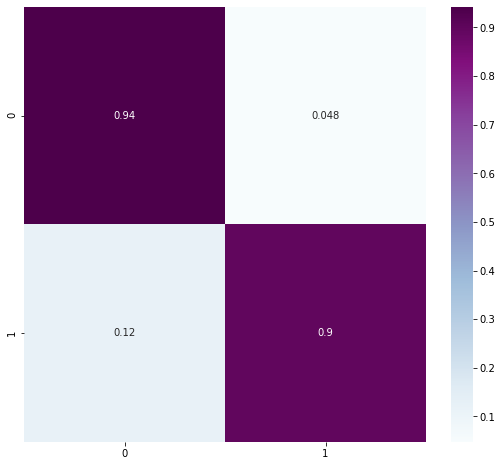

In [ ]:
### Afisare matrice confuzie ca procent:
cm = cm / cm.sum(axis=1) # Show in procents %
plt.figure(figsize=(9,8))
sn.heatmap(cm, annot=True, cmap="BuPu")

---
---
---
### (1) TESTAREA CLASIFICATORULUI (vizualizand imaginile x_test)
---
<li><b>label 0:</b> 4 - 6 ani (early childhood)</li>
<li><b>label 1:</b> 7 - 8 ani (middle childhood)</li>
<li><b>label 2:</b> 9 - 11 ani (late childhood)</li>
<li><b>label 3:</b> 12 - 19 ani (adolescence)</li>
<li><b>label 4:</b> 20 - 27 ani (early adulthood)</li>
<li><b>label 5:</b> 28 - 35 ani (middle adulthood)</li>
<li><b>label 6:</b> 36 - 45 ani (midlife)</li>
<li><b>label 7:</b> 46 - 60 ani (mature adulthood)</li>
<li><b>label 8:</b> 61 - 75 ani (late adulthood)</li>

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

most_recent = "GenderClass.h5"
most_recent2 = "GenderClass_best.h5"
model = load_model(most_recent2)

classifier = load_model(most_recent, compile=False)

def string_prezicere(pred):
    if pred == 0:
        pred = "F"
    if pred == 1:
        pred = "M"
    return pred

def draw_test(name, pred, pred_real, input_age, input_im):
    pred = string_prezicere(pred)
    pred_real = string_prezicere(pred_real)
    
    color_black = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT,value=color_black)
    cv2.putText(expanded_image, "prediction: {}".format(pred), (500, 30) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
    cv2.putText(expanded_image, "real_class: {}".format(pred_real), (500, 60) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,255,255), 1)
    
    cv2.imshow(name, expanded_image)

for i in range(0,18):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    input_label = y_test[rand]
    input_label = int(np.argmax(input_label))
    
    input_age = test_ages[rand]
        
    imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,224,224,3)
    
    ### Get Prediction
    res = list(classifier.predict(input_im, 1, verbose = 0)[0])
    index = int(np.argmax(res))
    print(res)

    draw_test("Prediction", index, input_label, input_age, imageL) 
    cv2.waitKey(0)

cv2.destroyAllWindows()

NameError: name 'x_test' is not defined

### (2) TESTAREA CLASIFICATORULUI (pe o singura imagine)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

simple = "AgeClass-2019-08-24-21-00.h5"
mobile = "AgeClass-2019-08-23-22-00_MobileDropout.h5"
google = "AgeClass-google-2019-08-29-23-00.h5"
most_recent = "AgeClass.h5"
most_recent2 = "AgeClass_best4762.h5"

classifier = load_model("AgeClass_best.h5", compile = False)

def draw_test(name, pred, input_im):
    black_color = [0,0,0]
    if pred == 0:
        pred = "04 - 06 ani"
    if pred == 1:
        pred = "07 - 08 ani"
    if pred == 2:
        pred = "09 - 11 ani"
    if pred == 3:
        pred = "12 - 19 ani"
    if pred == 4:
        pred = "20 - 27 ani"
    if pred == 5:
        pred = "28 - 35 ani"
    if pred == 6:
        pred = "36 - 45 ani"
    if pred == 7:
        pred = "46 - 60 ani"
    if pred == 8:
        pred = "61 - 75 ani"
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT,value=black_color)
    cv2.putText(expanded_image, str(pred), (50, 50) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (233,233,233), 2)
    cv2.imshow(name, expanded_image)

input_im = cv2.imread("poza3.jpg")
input_im = cv2.resize(input_im, (224,224))

imageL = cv2.resize(input_im, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

input_im = input_im.reshape(1,224,224,3)

## Get Prediction
res = list(classifier.predict(input_im, verbose = 0)[0])
print(res)
index = int(np.argmax(res))

draw_test("Prediction", index, imageL) 
cv2.waitKey(0)

cv2.destroyAllWindows()

---
## (3) TESTAREA CLASIFICATORULUI (Afisare continua webcam)

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

classifier = load_model("GenderClass_best.h5", compile = False)

def str_prezicere(pred):
    if pred == 0:
        pred = "F"
    if pred == 1:
        pred = "M"
    return pred

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
webcam = cv2.VideoCapture(0)
webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

while True:
    _, frame = webcam.read()

    # Detectie fata (preluare coordonate) cu HaarCascade
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
        gray_frame, scaleFactor=1.2, minNeighbors=5)

    for x, y, w, h in faces:
        input_im = frame[y:y + h, x:x + w]
        input_im = cv2.resize(input_im, (224, 224))

        input_im = input_im.reshape(1, 224, 224, 3)

        # Get Prediction
        res = list(classifier.predict(input_im, verbose=0)[0])
#         print(res)
        index = int(np.argmax(res))

        pred = str_prezicere(index)

        cv2.putText(frame, pred, (500, 50),
                    cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (233, 233, 233), 2)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

    cv2.imshow("Capturing", frame)

    key = cv2.waitKey(1)
    if key == ord('q') or key == ord('Q'):
        webcam.release()
        cv2.destroyAllWindows()
        break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()

---
## (4) TESTAREA CLASIFICATORULUI (Afisare continua webcam) cu interfata

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWidgets import QWidget
from PyQt5.QtGui import QImage
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import QTimer, QCoreApplication
from PyQt5 import QtCore, QtGui, QtWidgets

import cv2
import numpy as np
from keras.models import load_model

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
classifier = load_model("AgeClass_best.h5", compile = False)

class Widget_MainWindow(object):
    def setupUi(self, App):
        App.setObjectName("App")
        App.resize(640, 480)

        self.Layout_horizontal = QtWidgets.QHBoxLayout(App)
        self.Layout_horizontal.setObjectName("Layout_horizontal")
        self.Layout_vertical = QtWidgets.QVBoxLayout()
        self.Layout_vertical.setObjectName("Layout_vertical")

        self.PlaceHolder_CameraLabel = QtWidgets.QLabel(App)
        self.PlaceHolder_CameraLabel.setObjectName("PlaceHolder_CameraLabel")

        self.Layout_vertical.addWidget(self.PlaceHolder_CameraLabel)
        self.Btn_camera_on_off = QtWidgets.QPushButton(App)
        self.Btn_camera_on_off.setObjectName("Btn_camera_on_off")
        self.Btn_camera_on_off.setStyleSheet("background-color: white")
        self.Layout_vertical.addWidget(self.Btn_camera_on_off)
        self.Layout_horizontal.addLayout(self.Layout_vertical)

        self.retranslateUi(App)
        QtCore.QMetaObject.connectSlotsByName(App)

    def retranslateUi(self, App):
        _translate = QtCore.QCoreApplication.translate
        App.setWindowTitle(_translate("App", "Cam view"))
        App.setStyleSheet("background-color: gray;")
        
        self.PlaceHolder_CameraLabel.setText(_translate("App", "Camera Placeholder"))
        self.Btn_camera_on_off.setText(_translate("App", "Start Camera"))

        
def prezice_str(pred):
    if pred == 0:
        pred = "04 - 06 ani"
    if pred == 1:
        pred = "07 - 08 ani"
    if pred == 2:
        pred = "09 - 11 ani"
    if pred == 3:
        pred = "12 - 19 ani"
    if pred == 4:
        pred = "20 - 27 ani"
    if pred == 5:
        pred = "28 - 35 ani"
    if pred == 6:
        pred = "36 - 45 ani"
    if pred == 7:
        pred = "46 - 60 ani"
    if pred == 8:
        pred = "61 - 75 ani"
    return pred

class Widget_CameraWindow(QWidget):
    def __init__(self):
        # call QWidget constructor
        super().__init__()
        self.ui = Widget_MainWindow()
        self.ui.setupUi(self)

        # create a timer
        self.timer = QTimer()
        # set timer timeout callback function
        self.timer.timeout.connect(self.Webcam_update)
        # set Btn_camera_on_off callback clicked  function
        self.ui.Btn_camera_on_off.clicked.connect(self.controlTimer)

    def Webcam_update(self):
        _, frame = self.webcam.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detectie fata (preluare coordonate) cu HaarCascade
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.2, minNeighbors=5)
        
        for x, y, w, h in faces:
            input_im = frame[y:y + h, x:x + w]
            input_im = cv2.resize(input_im, (224, 224))
            input_im = input_im.reshape(1, 224, 224, 3)

            # Get Prediction
            res = list(classifier.predict(input_im, verbose=0)[0])
            index = int(np.argmax(res))

            pred = prezice_str(index)

            cv2.putText(frame, pred, (50, 50),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (233, 233, 233), 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

        # Frame info for PyQT
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_height, frame_width, frame_channel = frame.shape
        step = frame_channel * frame_width
        
        # Create QImage from frame
        qImg = QImage(frame.data, frame_width, frame_height, step, QImage.Format_RGB888)
        # Show frame in img_label
        self.ui.PlaceHolder_CameraLabel.setPixmap(QPixmap.fromImage(qImg))

    # start/stop timer
    def controlTimer(self):
        # if timer is stopped
        if not self.timer.isActive():
            self.webcam = cv2.VideoCapture(0)
            self.webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
            self.webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

            # start timer
            self.timer.start(20)
            # update Btn_camera_on_off text
            self.ui.Btn_camera_on_off.setText("Stop Camera")

        # if timer is started
        else:
            # stop timer
            self.timer.stop()
            # release video webcam
            self.webcam.release()
            # update Btn_camera_on_off text
            self.ui.Btn_camera_on_off.setText("Start Camera")

if __name__ == '__main__':
    app = QCoreApplication.instance()
    if app is None:
        app = QApplication(sys.argv)

    # create and show Widget_CameraWindow
    Widget_CameraWindow = Widget_CameraWindow()
    Widget_CameraWindow.show()

    sys.exit(app.exec_())

SystemExit: 0

---
## (4) TESTAREA CLASIFICATORULUI (Afisare continua webcam) cu interfata v2

In [ ]:
import sys
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWidgets import QWidget
from PyQt5.QtGui import QImage
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import QTimer, QCoreApplication
from PyQt5 import QtCore, QtGui, QtWidgets

import cv2
import numpy as np
from keras.models import load_model

face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
classifier = load_model("AgeClass_best.h5", compile = False)

class Widget_MainWindow(object):
    def setupUi(self, App):
        App.setObjectName("App")
        App.resize(640, 480)

        self.Layout_horizontal = QtWidgets.QHBoxLayout(App)
        self.Layout_horizontal.setObjectName("Layout_horizontal")
        self.Layout_vertical = QtWidgets.QVBoxLayout()
        self.Layout_vertical.setObjectName("Layout_vertical")

        self.PlaceHolder_CameraLabel = QtWidgets.QLabel(App)
        self.PlaceHolder_CameraLabel.setObjectName("PlaceHolder_CameraLabel")

        self.Layout_vertical.addWidget(self.PlaceHolder_CameraLabel)
        self.Btn_camera_on_off = QtWidgets.QPushButton(App)
        self.Btn_camera_on_off.setObjectName("Btn_camera_on_off")
        self.Btn_camera_on_off.setStyleSheet("background-color: white")
        self.Layout_vertical.addWidget(self.Btn_camera_on_off)
        self.Layout_horizontal.addLayout(self.Layout_vertical)

        self.retranslateUi(App)
        QtCore.QMetaObject.connectSlotsByName(App)

    def retranslateUi(self, App):
        _translate = QtCore.QCoreApplication.translate
        App.setWindowTitle(_translate("App", "Cam view"))
        App.setStyleSheet("background-color: gray;")
        
        self.PlaceHolder_CameraLabel.setText(_translate("App", "Camera Placeholder"))
        self.Btn_camera_on_off.setText(_translate("App", "Start Camera"))

        
def prezice_str(pred):
    if pred == 0:
        pred = "04 - 06 ani"
    if pred == 1:
        pred = "07 - 08 ani"
    if pred == 2:
        pred = "09 - 11 ani"
    if pred == 3:
        pred = "12 - 19 ani"
    if pred == 4:
        pred = "20 - 27 ani"
    if pred == 5:
        pred = "28 - 35 ani"
    if pred == 6:
        pred = "36 - 45 ani"
    if pred == 7:
        pred = "46 - 60 ani"
    if pred == 8:
        pred = "61 - 75 ani"
    return pred

class Widget_CameraWindow(QWidget):
    def __init__(self):
        # call QWidget constructor
        super().__init__()
        self.ui = Widget_MainWindow()
        self.ui.setupUi(self)

        # create a timer
        self.timer = QTimer()
        # set timer timeout callback function
        self.timer.timeout.connect(self.Webcam_update)
        # set Btn_camera_on_off callback clicked  function
        self.ui.Btn_camera_on_off.clicked.connect(self.controlTimer)

    def Webcam_update(self):
        _, frame = self.webcam.read()
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # Detectie fata (preluare coordonate) cu HaarCascade
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray_frame, scaleFactor=1.2, minNeighbors=5)
        
        for x, y, w, h in faces:
            input_im = frame[y:y + h, x:x + w]
            input_im = cv2.resize(input_im, (224, 224))
            input_im = input_im.reshape(1, 224, 224, 3)

            # Get Prediction
            res = list(classifier.predict(input_im, verbose=0)[0])
            index = int(np.argmax(res))

            pred = prezice_str(index)

            cv2.putText(frame, pred, (50, 50),
                        cv2.FONT_HERSHEY_COMPLEX_SMALL, 2, (233, 233, 233), 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 255), 3)

        # Frame info for PyQT
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_height, frame_width, frame_channel = frame.shape
        step = frame_channel * frame_width
        
        # Create QImage from frame
        qImg = QImage(frame.data, frame_width, frame_height, step, QImage.Format_RGB888)
        # Show frame in img_label
        self.ui.PlaceHolder_CameraLabel.setPixmap(QPixmap.fromImage(qImg))

    # start/stop timer
    def controlTimer(self):
        # if timer is stopped
        if not self.timer.isActive():
            self.webcam = cv2.VideoCapture(0)
            self.webcam.set(cv2.CAP_PROP_FRAME_WIDTH, 640)
            self.webcam.set(cv2.CAP_PROP_FRAME_HEIGHT, 480)

            # start timer
            self.timer.start(20)
            # update Btn_camera_on_off text
            self.ui.Btn_camera_on_off.setText("Stop Camera")

        # if timer is started
        else:
            # stop timer
            self.timer.stop()
            # release video webcam
            self.webcam.release()
            # update Btn_camera_on_off text
            self.ui.Btn_camera_on_off.setText("Start Camera")

if __name__ == '__main__':
    app = QCoreApplication.instance()
    if app is None:
        app = QApplication(sys.argv)

    # create and show Widget_CameraWindow
    Widget_CameraWindow = Widget_CameraWindow()
    Widget_CameraWindow.show()

    sys.exit(app.exec_())

SystemExit: 0

---
---
## Convert .h5 model to tensorflow lite!

In [ ]:
import tensorflow as tf

# converter = tf.contrib.lite.TFLiteConverter.from_keras_model_file("AgeClass_best.h5")
# converter = tf.lite.TFLiteConverter.from_keras_model_file("AgeClass_best.h5")
tflite_model = converter.convert()

with open('AgeClass-05-30-04-16.tflite', 'wb') as f:
    f.write(tflite_model)
print("Done!")